In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/data-kualitas-pucuk-sedep-2/Data_Kualitas_Pucuk.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('/kaggle/input/data-kualitas-pucuk-sedep-2/Data_Kualitas_Pucuk.csv')
df.head()

,P+1,P+3,BM+1,BM+2,DM,KSR,RS,GULMA,APLO
0,2,24,2,19,6,57,6,9,53
1,3,17,2,31,4,60,7,10,52
2,4,18,2,29,5,57,6,11,51
3,2,16,2,25,5,67,2,7,48
4,3,17,1,26,5,68,2,6,48


In [4]:
df.dtypes

P+1      int64
P+3      int64
BM+1     int64
BM+2     int64
DM       int64
KSR      int64
RS       int64
GULMA    int64
APLO     int64
dtype: object

In [5]:
df.describe()

,P+1,P+3,BM+1,BM+2,DM,KSR,RS,GULMA,APLO
count,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000
mean,4.739726,18.356164,1.794521,24.342466,5.178082,63.465753,2.589041,9.041096,50.205479
std,2.068463,4.008220,0.599975,5.145708,1.071635,4.193521,1.544125,3.380657,2.656015
min,2.000000,4.000000,1.000000,13.000000,3.000000,53.000000,1.000000,4.000000,43.000000
25%,3.000000,16.000000,1.000000,22.000000,4.000000,60.000000,1.000000,7.000000,48.000000
50%,4.000000,18.000000,2.000000,23.000000,5.000000,63.000000,2.000000,8.000000,50.000000
75%,6.000000,21.000000,2.000000,28.000000,6.000000,67.000000,3.000000,10.000000,52.000000
max,10.000000,26.000000,3.000000,42.000000,8.000000,74.000000,7.000000,25.000000,55.000000


<Figure size 720x576 with 0 Axes>

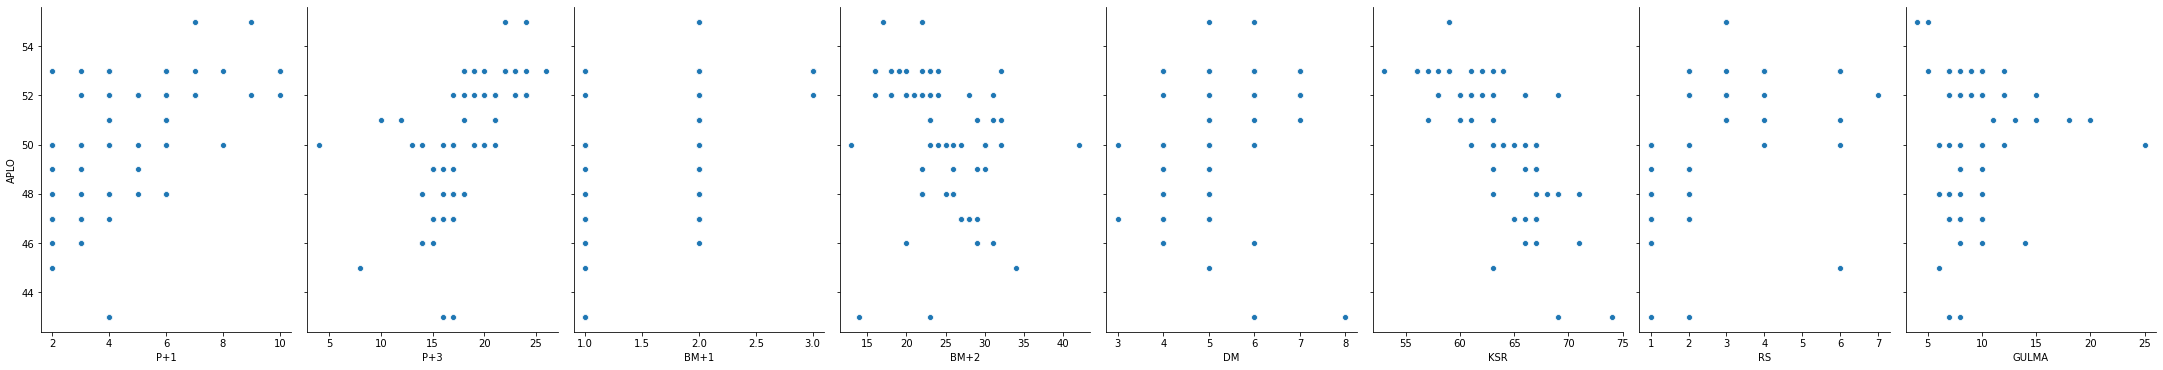

In [6]:
plt.figure(figsize=(10, 8))
sns.pairplot(data=df,
             x_vars=['P+1', 'P+3', 'BM+1', 'BM+2', 'DM', 'KSR', 'RS', 'GULMA'],
             y_vars=['APLO'],
             height=5, aspect=0.75)

In [7]:
df.corr().style.background_gradient().set_precision(2)

,P+1,P+3,BM+1,BM+2,DM,KSR,RS,GULMA,APLO
P+1,1.00,0.58,0.24,-0.61,0.32,-0.23,0.15,-0.09,0.54
P+3,0.58,1.00,0.33,-0.76,0.36,-0.41,0.19,-0.38,0.62
BM+1,0.24,0.33,1.00,-0.27,0.36,-0.46,0.46,0.19,0.49
BM+2,-0.61,-0.76,-0.27,1.00,-0.46,0.13,-0.09,0.31,-0.32
DM,0.32,0.36,0.36,-0.46,1.00,-0.32,0.33,0.25,0.28
KSR,-0.23,-0.41,-0.46,0.13,-0.32,1.00,-0.64,-0.07,-0.74
RS,0.15,0.19,0.46,-0.09,0.33,-0.64,1.00,0.13,0.48
GULMA,-0.09,-0.38,0.19,0.31,0.25,-0.07,0.13,1.00,0.06
APLO,0.54,0.62,0.49,-0.32,0.28,-0.74,0.48,0.06,1.00


In [8]:
x = df.drop(columns='APLO')
y = df['APLO']

x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=0)

model = LinearRegression()

model.fit(x_train, y_train)

model.score(x_test, y_test)

0.6977623938344446

In [9]:
model.predict([[2, 24, 2, 19, 6, 57, 10, 6]])

array([52.20333217])

In [10]:
import pickle
pickle.dump(model, open('model_prediksi_aplo.sav', 'wb'))

In [11]:
loaded_model = pickle.load(open('model_prediksi_aplo.sav', 'rb'))
result = loaded_model.score(x_test, y_test)
print('Accuracy Model : ',result)
loaded_model.predict([[2, 24, 2, 19, 6, 57, 10, 6]])

Accuracy Model :  0.6977623938344446


array([52.20333217])